

# Statistical foundations of Machine Learning

## INFO-F-422 TP: Maximum likelihood and bootstrapping

Yann-Aël Le Borgne, Fabrizio Carcillo and Gianluca Bontempi

March 28, 2017


## Repetition

### Basic definitions

Let $p_z(z,\theta)$ be a density function (continuous or discrete) which depends on a parameter $\theta$ and $D_n=\{z_1,z_2,\ldots,z_N\}$ a sampleset of independent draws following a distribution $p_z$.

**Definition 1** The joint probability density function of the sampleset is

\begin{equation}
 p_{D_N}(D_N,\theta)=\prod_{i=1}^N p_z (z_i,\theta)=L_N(\theta).
\end{equation}

For each fixed $D_N$, $L_N$ is a function of $\theta$ and is called *empirical likelihood* of $\theta$ given $D_N$.

**Definition 2** Given an unknown parameter $\theta$ and sampleset $D_N$, the estimation $\hat{\theta}$ of $\theta$ obtained using the maximum likelihood is the value for which the likelihood $L_N(\theta)$ is maximal:

\begin{equation}
 \hat{\theta}_{ml}=\arg\max_{\theta\in \Theta} L_N(\theta).
\end{equation}

Often, the logarithm of the likelihood $l_N(\theta)$ is used which takes its maximum at the same point as the likelihood $L_N(\theta)$ since the logarithm is a monotone function:

\begin{equation}
  \hat{\theta}_{ml}=\arg\max_{\theta\in \Theta} L_N(\theta)=\arg\max_{\theta\in \Theta} l_N(\theta)
\end{equation}

The idea of the maximum likelihood method is to find the value of the parameter $\theta$  for which the observed values have the highest probability of appearing.


## Gaussian distribution

Given a Gaussian distribution $\mathbf{z}\sim\mathcal{N}(\mu,\sigma^2)$, it can be shown that

\begin{align}
 \hat{\mu}_{ml}&=\frac{\sum_{i=1}^N z_i}{N}=\hat{\mu}\\
\hat{\sigma}^2_{ml}&= \frac{\sum_{i=1}^N (z_i-\hat{\mu}_{ml})^2}{N}\neq \hat{\sigma}^2.
\end{align}


## Exercises

### Exercise 1

Let a binary variable ("coin toss") take $z$ times the value 1 on $N$ tries. Suppose that the underlying probabilistic model is a binomial variable with unknown parameter $\theta=p$. The maximum likelihood method gives

\begin{equation}
 \hat{p}=\arg\max_p\binom{N}{z}p^z(1-p)^{N-z}.
\end{equation}

It can be shown that $\hat{p}=z/N$. Verify this result empirically by drawing the curve $\binom{N}{z}p^z(1-p)^{N-z}$ in function of $p$.


In [14]:
N <- 11 
z <- 7 

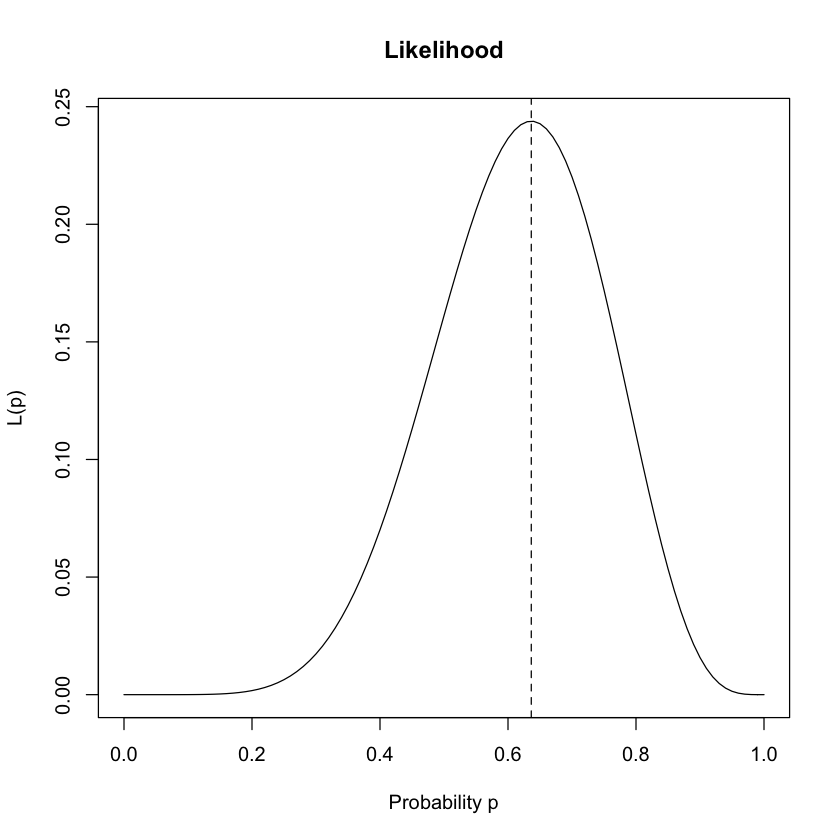

In [16]:
p <- seq(0,1,by=.01)
L <- sapply(p,dbinom,size=N,x=z)

plot(p,L,main="Likelihood",type="l", xlab="Probability p",ylab="L(p)")
abline(v=z/N,lty=2)

### Exercise 2

The functions `optimize` and `optim` allow, respectively, to carry out numerical optimization (heuristics) of functions of multiple variables. These functions carry out a search for the minimum. Ex.: consider the function $f(x)=(x-1/3)^2$, $x\in \,I=[0,1]$. The minimum is given by 


In [17]:
f <- function(x,a) (x-a)^2
xmin <- optimize(f, c(0,1), tol=0.0001, a=1/3)
xmin


$minimum
[1] 0.3333333

$objective
[1] 0

Use the optimize functions for the estimation of the mean and variance of a variable following a normal distribution applying the maximum likelihood method. 

In [42]:
## Initialize
N <- 100
DN <- rnorm(N,-1,1) 

In [43]:
emp_lik <- function(mu,Dn,var) {   
         N <- length(Dn)
         Lik <- 1
         for (i in 1:N)
           Lik <- Lik*dnorm(Dn[i],mu,sqrt(var))
         -log(Lik)
     }

emp_lik2 <- function(mu_var,Dn) {
         N <- length(Dn)
         Lik <- 1
         for (i in 1:N)
           Lik <- Lik*dnorm(Dn[i],mu_var[1],sqrt(mu_var[2]))
         -log(Lik)
     }



xmin <- optimize( emp_lik, c(-1,1), Dn=DN, var=1 )
xmin2 <- optim( c(-2,2),emp_lik2, Dn=DN )

In [44]:
print(xmin)

$minimum
[1] -0.999959

$objective
[1] 141.0741



In [45]:
print(xmin2)

$par
[1] -1.1712499  0.9543578

$value
[1] 139.5549

$counts
function gradient 
      53       NA 

$convergence
[1] 0

$message
NULL



In [46]:
print(mean(DN))
print(var(DN))

[1] -1.171153
[1] 0.9639378


### Exercise 3

This script demonstrates the bootstrapping method. The bootstrapping allows to evaluate the uncertainty associated to the estimation of a parameter. It consists of resampling the dataset to obtain multiple estimations of the parameter in question. The set of estimations have a distribution which can be used to characterize the uncertainty of the parameter estimation.


In [55]:
set.seed(0)

Sample.sizes<-seq(100,10000,by=100)


For the given sample sizes, estimate the 0.9 quantile of a uniformly distributed variable in the interval $[0,10]$.
Estimate the mean in a second graph followed by an estimation of the variance. 

Vary the parameter B (B=10 and B=100 for example) to understand how the number of resamplings influence the observed variances.


In [62]:
B<-100

Q.hat<-NULL
Qb.mean.hat<-NULL
Qb.var.hat<-NULL

for (N in Sample.sizes){
  DN<-runif(N,0,10)
  Q.hat<-c(Q.hat,quantile(DN,probs=0.9))
  Qb<-NULL
    for (b in 1:10){
      Db<-sample(DN,replace=TRUE)
      Qb<-c(Qb,quantile(Db,probs=0.9))
    }
  Qb.mean.hat<-c(Qb.mean.hat,mean(Qb))  
  Qb.var.hat<-c(Qb.var.hat,var(Qb))  
}

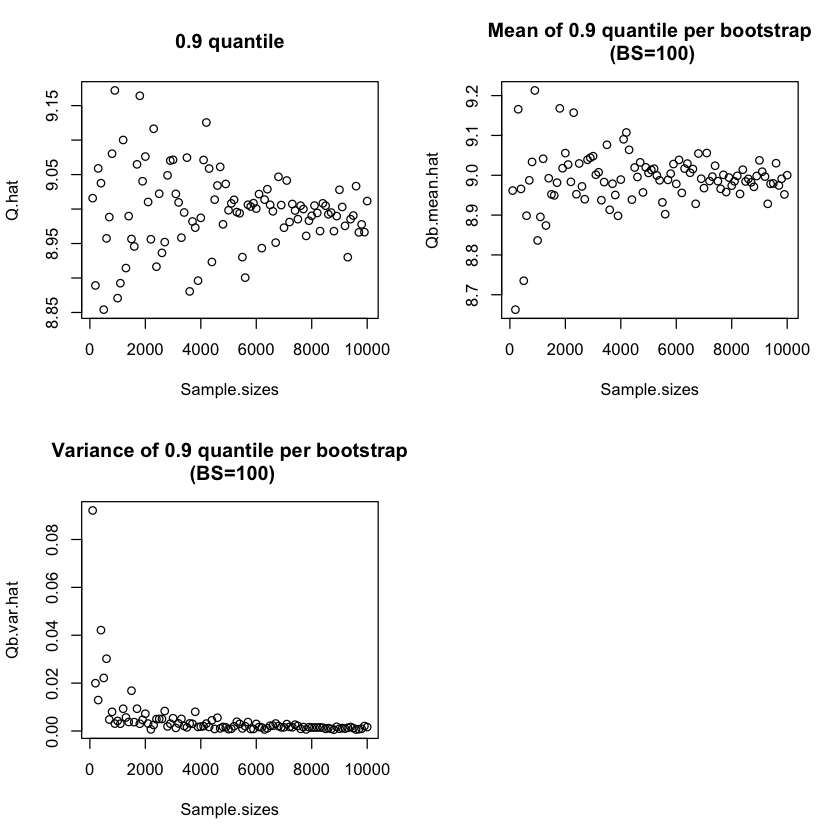

In [63]:
par(mfrow=c(2,2))
plot(Sample.sizes,Q.hat,main="0.9 quantile")
plot(Sample.sizes,Qb.mean.hat,main=paste("Mean of 0.9 quantile per bootstrap\n (BS=",B,")",sep=""))
plot(Sample.sizes,Qb.var.hat,main=paste("Variance of 0.9 quantile per bootstrap\n (BS=",B,")",sep=""))
